# Exercise

Use the code in this notebook to complete the following exercises:

1. For `df1`:

    - Take a look at the data in `df1`.
    - Does `x` increase from time one to time two?
    - Visualize the relationship between `x` and `time`.
    - Run a statistical test to further examine the relationship between these features.
    
 1. For `df2`:
 
    - Take a look at the data in `df2`.
    - Visualize the relationship between `x` and `y`.
    - How would you describe the relationship between `x` and `y`?
    - Run a statistical test to examine the relationship between `x` and `y`.

1. For `df3`:

    - Take a look at the data in `df3`
    - Which surgeon has the higher success rate?
    - If you had to have heart bypass surgery, which surgeon would you go to?

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

df1 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/one.csv')
df2 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/two.csv')
df3 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/a6e34db05ac8d817789c205787527974fa10c092/three.csv')

# 1. For `df1`:

    - Take a look at the data in `df1`.
    - Does `x` increase from time one to time two?
    - Visualize the relationship between `x` and `time`.
    - Run a statistical test to further examine the relationship between these features.
    

In [3]:
df1

,group,x,time
0,a,7.087113,one
1,a,5.164441,one
2,a,6.150206,one
3,a,3.732648,one
4,a,5.181035,one
...,...,...,...
195,b,9.308194,two
196,a,3.931530,two
197,a,3.385066,two
198,b,8.247980,two


In [4]:
df1.groupby('time').x.mean()

time
one    5.726669
two    7.296448
Name: x, dtype: float64

In [5]:
#looking at pivot time
df1.pivot_table('x', 'group', 'time')

time,one,two
group,,
a,5.084092,2.936197
b,10.026997,8.065904


In [6]:
#crosstab
pd.crosstab(df1.group, df1.time)

time,one,two
group,,
a,87,15
b,13,85


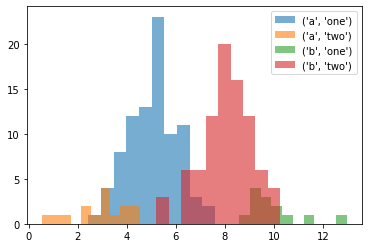

In [9]:
for subgroup, x in df1.groupby(['group', 'time']).x:
    plt.hist(x, label=str(subgroup), alpha=.6)
plt.legend()

In [7]:
#Looking at values sorted by time and then by x value
df1.sort_values(by=['time','x'])

,group,x,time
97,a,2.442945,one
31,a,2.974954,one
13,a,3.022112,one
65,a,3.123131,one
19,a,3.138024,one
...,...,...,...
194,b,9.716040,two
165,b,9.784357,two
142,b,9.930851,two
115,b,9.984582,two


<AxesSubplot:xlabel='time', ylabel='x'>

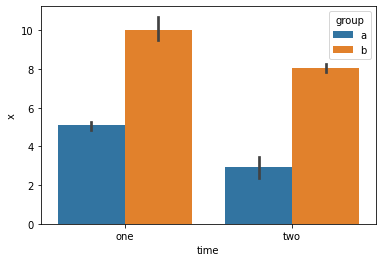

In [8]:
sns.barplot(x='time', y= 'x', data= df1,  hue='group')

In [10]:
x1= df1['x'][df1['time'] == 'one']
x2= df1['x'][df1['time'] == 'two']

In [11]:
alpha = 0.05

In [25]:
t, p = stats.ttest_ind(x1, x2, equal_var= False)
t,p

(-5.443902721870272, 1.540692865596767e-07)

## Looking at visuals of df1 and df2

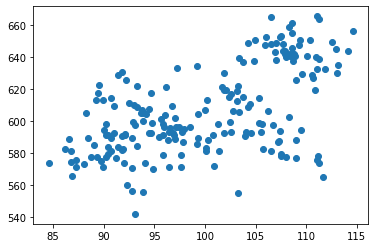

In [12]:
plt.scatter(df2.x, df2.y)

# 2. For `df2`:
 
    - Take a look at the data in `df2`.
    - Visualize the relationship between `x` and `y`.
    - How would you describe the relationship between `x` and `y`?
    - Run a statistical test to examine the relationship between `x` and `y`.

In [26]:
df2

,x,y,group
0,101.243108,597.915453,a
1,107.492036,579.638663,a
2,105.348935,614.607337,a
3,99.981116,607.082320,a
4,102.764199,606.082835,a
...,...,...,...
195,109.263191,647.120801,d
196,108.898932,640.437291,d
197,109.539255,629.554555,d
198,105.879511,647.396688,d


<AxesSubplot:xlabel='x', ylabel='y'>

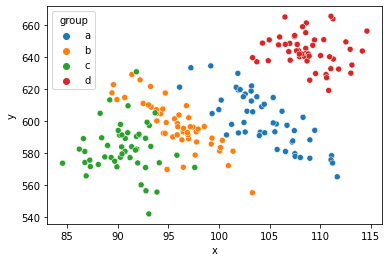

In [37]:
#visualizing using seaborn scatterplot
sns.scatterplot(x='x', y= 'y', data= df2,  hue='group')

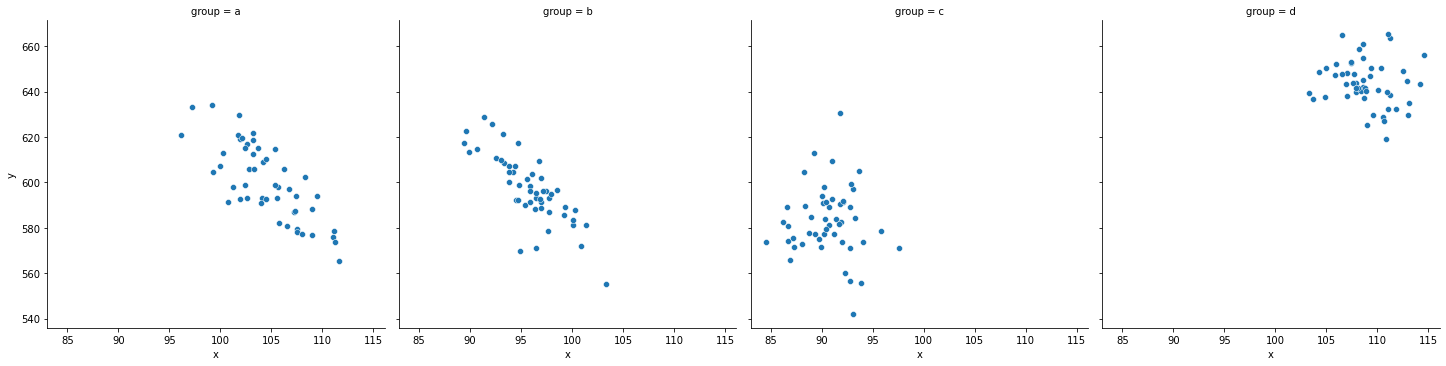

In [38]:
sns.relplot(data=df2, y= 'y', x='x', col='group')

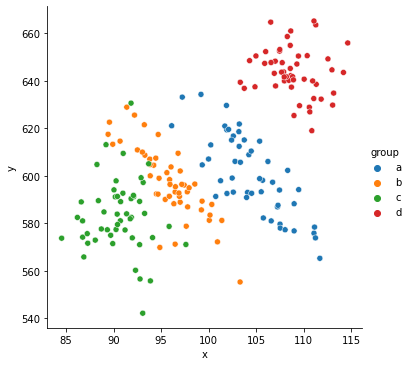

In [13]:
#visualizing using seaborn relplot with hue
sns.relplot(data=df2, hue='group', x='x', y='y')

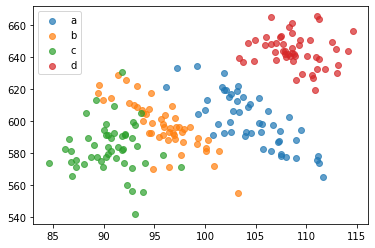

In [39]:
#creating for loop to visulize
for group, subset in df2.groupby('group'):
    plt.scatter(subset.x, subset.y, label= group, alpha=.7)
plt.legend()

# 3. For `df3`:

    - Take a look at the data in `df3`
    - Which surgeon has the higher success rate?
    - If you had to have heart bypass surgery, which surgeon would you go to?

## Answer: 
- Surgeon A has the highest success rate
- If you were to have heart bypass surgery you would want to go to Surgeon B

In [35]:
df3.groupby('surgeon').success.mean()

surgeon
A    0.877083
B    0.723077
Name: success, dtype: float64

In [36]:
pd.crosstab(df3.surgeon, df3.surgery)

surgery,appendectomy,heart bypass
surgeon,,
A,381,99
B,102,418


## Simpson's Paradox

- def: When the relationship between two variables reverses itself when controlling for a third variable.
- make sure you visualize interactions between <i>multiple</i> variables
- be careful about assumptions around group proportions